In [1]:
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]


In [2]:
data_folder = r"E:\data\gst-0710-23\N9\N9E12\EvaluatingHow\Rollback"
# GG
beta_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
gg_fitness, gs_fitness, ss_fitness, sg_fitness = [], [], [], []
gg_variance, gs_variance, ss_variance, sg_variance = [], [], [], []
gg_fitness_across_time, gs_fitness_across_time, ss_fitness_across_time, sg_fitness_across_time = [], [], [], []
for beta in beta_list:
    gg_performance_file = data_folder + r"\gg_performance_across_K_beta_{0}".format(beta)
    gg_first_quantile_file = data_folder + r"\gg_first_quantile_across_K_beta_{0}".format(beta)
    gg_last_quantile_file = data_folder + r"\gg_last_quantile_across_K_beta_{0}".format(beta)
    gg_cog_performance_file = data_folder + r"\gg_cog_performance_across_K_time_beta_{0}".format(beta)
    gg_variance_file = data_folder + r"\gg_variance_across_K_beta_{0}".format(beta)
    gg_performance_time_file = data_folder + r"\gg_performance_across_K_time_beta_{0}".format(beta)
    # GS
    gs_performance_file = data_folder + r"\gs_performance_across_K_beta_{0}".format(beta)
    gs_first_quantile_file = data_folder + r"\gs_first_quantile_across_K_beta_{0}".format(beta)
    gs_last_quantile_file = data_folder + r"\gs_last_quantile_across_K_beta_{0}".format(beta)
    gs_cog_performance_file = data_folder + r"\gs_cog_performance_across_K_time_beta_{0}".format(beta)
    gs_variance_file = data_folder + r"\gs_variance_across_K_beta_{0}".format(beta)
    gs_performance_time_file = data_folder + r"\gs_performance_across_K_time_beta_{0}".format(beta)
    # SS
    ss_performance_file = data_folder + r"\ss_performance_across_K_beta_{0}".format(beta)
    ss_first_quantile_file = data_folder + r"\ss_first_quantile_across_K_beta_{0}".format(beta)
    ss_last_quantile_file = data_folder + r"\ss_last_quantile_across_K_beta_{0}".format(beta)
    ss_cog_performance_file = data_folder + r"\ss_cog_performance_across_K_time_beta_{0}".format(beta)
    ss_variance_file = data_folder + r"\ss_variance_across_K_beta_{0}".format(beta)
    ss_performance_time_file = data_folder + r"\ss_performance_across_K_time_beta_{0}".format(beta)
    # SG
    sg_performance_file = data_folder + r"\sg_performance_across_K_beta_{0}".format(beta)
    sg_first_quantile_file = data_folder + r"\sg_first_quantile_across_K_beta_{0}".format(beta)
    sg_last_quantile_file = data_folder + r"\sg_last_quantile_across_K_beta_{0}".format(beta)
    sg_cog_performance_file = data_folder + r"\sg_cog_performance_across_K_time_beta_{0}".format(beta)
    sg_variance_file = data_folder + r"\sg_variance_across_K_beta_{0}".format(beta)
    sg_performance_time_file = data_folder + r"\sg_performance_across_K_time_beta_{0}".format(beta)

    # GG
    with open(gg_performance_file, 'rb') as infile:
        gg_fitness.append(pickle.load(infile))
    with open(gg_variance_file, 'rb') as infile:
        gg_variance.append(pickle.load(infile))
    with open(gg_performance_time_file, 'rb') as infile:
        gg_fitness_across_time.append(pickle.load(infile))
    # GS
    with open(gs_performance_file, 'rb') as infile:
        gs_fitness.append(pickle.load(infile))
    with open(gs_variance_file, 'rb') as infile:
        gs_variance.append(pickle.load(infile))
    with open(gs_performance_time_file, 'rb') as infile:
        gs_fitness_across_time.append(pickle.load(infile))
    # SS
    with open(ss_performance_file, 'rb') as infile:
        ss_fitness.append(pickle.load(infile))
    with open(ss_variance_file, 'rb') as infile:
        ss_variance.append(pickle.load(infile))
    with open(ss_performance_time_file, 'rb') as infile:
        ss_fitness_across_time.append(pickle.load(infile))
    # SG
    with open(sg_performance_file, 'rb') as infile:
        sg_fitness.append(pickle.load(infile))
    with open(sg_variance_file, 'rb') as infile:
        sg_variance.append(pickle.load(infile))
    with open(sg_performance_time_file, 'rb') as infile:
        sg_fitness_across_time.append(pickle.load(infile))

In [3]:
# Baseline: independent search
baseline_folder = r"E:\data\gst-0610-23\MaxMin\full_20"
g_performance_file = baseline_folder + r"\g_performance_across_K"
s_performance_file = baseline_folder + r"\s_performance_across_K"
# t_performance_file = data_folder + r"\t_performance_across_K"

g_first_quantile_file = baseline_folder + r"\g_first_quantile_across_K"
s_first_quantile_file = baseline_folder + r"\s_first_quantile_across_K"
# t_first_quantile_file = data_folder + r"\t_first_quantile_across_K"

g_last_quantile_file = baseline_folder + r"\g_last_quantile_across_K"
s_last_quantile_file = baseline_folder + r"\s_last_quantile_across_K"
# t_last_quantile_file = data_folder + r"\t_last_quantile_across_K"

g_cog_performance_file = baseline_folder + r"\g_cog_performance_across_K_time"
s_cog_performance_file = baseline_folder + r"\s_cog_performance_across_K_time"
# t_cog_performance_file = data_folder + r"\t_cog_performance_across_K_time"

g_variance_file = baseline_folder + r"\g_variance_across_K"
s_variance_file = baseline_folder + r"\s_variance_across_K"
# t_variance_file = data_folder + r"\t_variance_across_K"

g_performance_time_file = baseline_folder + r"\g_performance_across_K_time"
s_performance_time_file = baseline_folder + r"\s_performance_across_K_time"
# t_performance_time_file = data_folder + r"\t_performance_across_K_time"

with open(g_performance_file, 'rb') as infile:
    g_fitness = pickle.load(infile)
with open(s_performance_file, 'rb') as infile:
    s_fitness = pickle.load(infile)
# with open(t_performance_file, 'rb') as infile:
#     t_fitness = pickle.load(infile)

with open(g_first_quantile_file, 'rb') as infile:
    g_first = pickle.load(infile)
with open(s_first_quantile_file, 'rb') as infile:
    s_first = pickle.load(infile)
# with open(t_first_quantile_file, 'rb') as infile:
#     t_first = pickle.load(infile)

with open(g_last_quantile_file, 'rb') as infile:
    g_last = pickle.load(infile)
with open(s_last_quantile_file, 'rb') as infile:
    s_last = pickle.load(infile)
# with open(t_last_quantile_file, 'rb') as infile:
#     t_last = pickle.load(infile)

with open(g_cog_performance_file, 'rb') as infile:
    g_cog_fitness = pickle.load(infile)
with open(s_cog_performance_file, 'rb') as infile:
    s_cog_fitness = pickle.load(infile)
# with open(t_performance_file, 'rb') as infile:
#     t_cog_fitness = pickle.load(infile)

with open(g_variance_file, 'rb') as infile:
    g_variance = pickle.load(infile)
with open(s_variance_file, 'rb') as infile:
    s_variance = pickle.load(infile)
# with open(t_variance_file, 'rb') as infile:
#     t_variance = pickle.load(infile)

with open(g_performance_time_file, 'rb') as infile:
    g_performance_time = pickle.load(infile)
with open(s_performance_time_file, 'rb') as infile:
    s_performance_time = pickle.load(infile)
# with open(t_performance_time_file, 'rb') as infile:
#     t_performance_time = pickle.load(infile)
print(np.array(g_performance_time).shape)
print(g_fitness)

(10, 400)
[0.7152643586989593, 0.7050298222586862, 0.6940540032540344, 0.6859945114931795, 0.6763627077065751, 0.6699782461751644, 0.6600182947995531, 0.6531018845266701, 0.645362933810894, 0.636720321087895]


In [4]:
print(gg_fitness[0])
print(len(gg_fitness[1]))

[0.6493241293405417, 0.6558578164768152, 0.6493717891503629, 0.6464392301952385, 0.6412370300015673, 0.6337263862185452, 0.629469787187901, 0.6236803007191701, 0.614679678942553, 0.6162642136404053]


<ipython-input-6-333d92b0ff9f>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, gg_fitness[0], "k-", label="$\\beta={0}$".format(beta_list[0]), color=nature_orange)
<ipython-input-6-333d92b0ff9f>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, gg_fitness[1][10:], "k-", label="$\\beta={0}$".format(beta_list[1]), color=nature_orange)


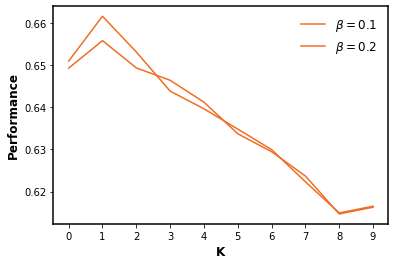

In [6]:
# S Fitness
x = range(len(gg_fitness[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, gg_fitness[0], "k-", label="$\\beta={0}$".format(beta_list[0]), color=nature_orange)
plt.plot(x, gg_fitness[1][10:], "k-", label="$\\beta={0}$".format(beta_list[1]), color=nature_orange)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\S_performance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

In [ ]:
# G Fitness
x = range(len(gs_fitness))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, gg_fitness, "k-", label="GG", color=nature_orange)
plt.plot(x, sg_fitness, "k-", label="SG", color=nature_green)
plt.plot(x, g_fitness, "k-", label="G", color=nature_blue)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\G_performance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

In [ ]:
# GST Variance
x = range(len(g_variance))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, gg_variance, "k-", label="GG", color=nature_orange)
plt.plot(x, sg_variance, "k-", label="SG", color=nature_green)
plt.plot(x, g_variance, "k-", label="G", color=nature_blue)
# plt.plot(x, t_variance, "k-", label="T", color=nature_orange)

plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Variance', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\G_variance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

In [ ]:
# Assess the time dimension
x = range(len(gg_performance_time[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, gg_performance_time[0], "k-", label="K=0", color=morandi_green)
plt.plot(x, gg_performance_time[1], "k-", label="K=1", color=morandi_orange)
plt.plot(x, gg_performance_time[2], "k-", label="K=2", color=morandi_red)
plt.plot(x, gg_performance_time[3], "k-", label="K=3", color=morandi_purple)
plt.plot(x, gg_performance_time[-1], "k-", label="K=9", color=deep_grey)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\GG_performance_time.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

In [ ]:
# Assess the time dimension
x = range(len(sg_performance_time[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, sg_performance_time[0], "k-", label="K=0", color=morandi_green)
plt.plot(x, sg_performance_time[1], "k-", label="K=1", color=morandi_orange)
plt.plot(x, sg_performance_time[2], "k-", label="K=2", color=morandi_red)
plt.plot(x, sg_performance_time[3], "k-", label="K=3", color=morandi_purple)
plt.plot(x, sg_performance_time[-1], "k-", label="K=9", color=deep_grey)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\SG_performance_time.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

In [ ]:
# Assess the time dimension
x = range(len(gs_performance_time[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(range(len(s_performance_time[-1])), s_performance_time[0], "k--", label="K=0", color=deep_grey)
plt.plot(x, gs_performance_time[0], "k-", label="K=0", color=morandi_green)
plt.plot(x, gs_performance_time[1], "k-", label="K=1", color=morandi_orange)
plt.plot(x, gs_performance_time[2], "k-", label="K=2", color=morandi_red)
plt.plot(x, gs_performance_time[3], "k-", label="K=3", color=morandi_purple)
plt.plot(x, gs_performance_time[-1], "k-", label="K=9", color=deep_grey)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\GS_performance_time.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

In [ ]:
# Assess the time dimension
x = range(len(ss_performance_time[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, ss_performance_time[0], "k-", label="K=0", color=morandi_green)
plt.plot(x, ss_performance_time[1], "k-", label="K=1", color=morandi_orange)
plt.plot(x, ss_performance_time[2], "k-", label="K=2", color=morandi_red)
plt.plot(x, ss_performance_time[3], "k-", label="K=3", color=morandi_purple)
plt.plot(x, ss_performance_time[-1], "k-", label="K=9", color=deep_grey)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\SS_performance_time.png", transparent=True, dpi=300)
plt.show()
# plt.clf()